In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("data.csv")
df["ber"] = df["ber"].apply(lambda x: str(x)[0]).astype("category")
df = df[(df.monthly_price < 4000) & (df.monthly_price > 1000)]
df

,bathrooms,bedrooms,ber,latitude,longitude,monthly_price,is_apartment
0,1.0,1.0,A,53.289061,-6.233999,2150,True
1,2.0,2.0,A,53.289061,-6.233999,2350,True
2,2.0,3.0,A,53.289061,-6.233999,3200,True
3,1.0,1.0,A,53.279347,-6.313134,1875,True
4,1.0,1.0,A,53.347475,-6.233233,2501,True
...,...,...,...,...,...,...,...
1039,2.0,2.0,C,53.342098,-6.314104,2144,True
1040,2.0,3.0,C,53.335855,-6.280015,3250,False
1041,1.0,1.0,A,53.242673,-6.191171,1875,True
1042,2.0,2.0,A,53.242673,-6.191171,2250,True


In [40]:
X = df.drop("monthly_price", axis=1)
y = df["monthly_price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [41]:
param_grid = {
    "learning_rate": [0.3, 0.2, 0.1, 0.01, 0.001],
    "n_estimators": [20, 30, 50, 100, 200, 300],
    "max_depth": [2, 3, 4],
}

regressor = xgb.XGBRegressor(enable_categorical=True, random_state=42)

grid_search = GridSearchCV(
    estimator=regressor, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error"
)

grid_search.fit(X_train, y_train)
# regressor.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.3, 0.2, 0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [20, 30, 50, 100, 200, 300]},
             scoring='neg_mean_squared_error')

In [42]:
print(grid_search.best_params_)
grid_search.best_estimator_.score(X_test, y_test)
# grid_search.best_estimator_.save_model("model.json")

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


0.6106999115939374

In [43]:
y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

362.64554250468854

(0.0, 4000.0)

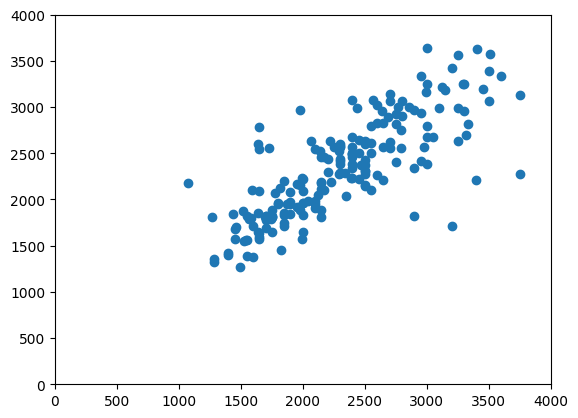

In [44]:
plt.scatter(y_test, y_pred)
plt.xlim(0, 4000)
plt.ylim(0, 4000)

In [45]:
grid_search.best_estimator_.feature_importances_

array([0.26344997, 0.5560264 , 0.03925693, 0.04302298, 0.05268093,
       0.04556273], dtype=float32)

In [46]:
grid_search.best_estimator_.get_booster().feature_names

['bathrooms', 'bedrooms', 'ber', 'latitude', 'longitude', 'is_apartment']

In [ ]:
# grid_search.best_estimator_.

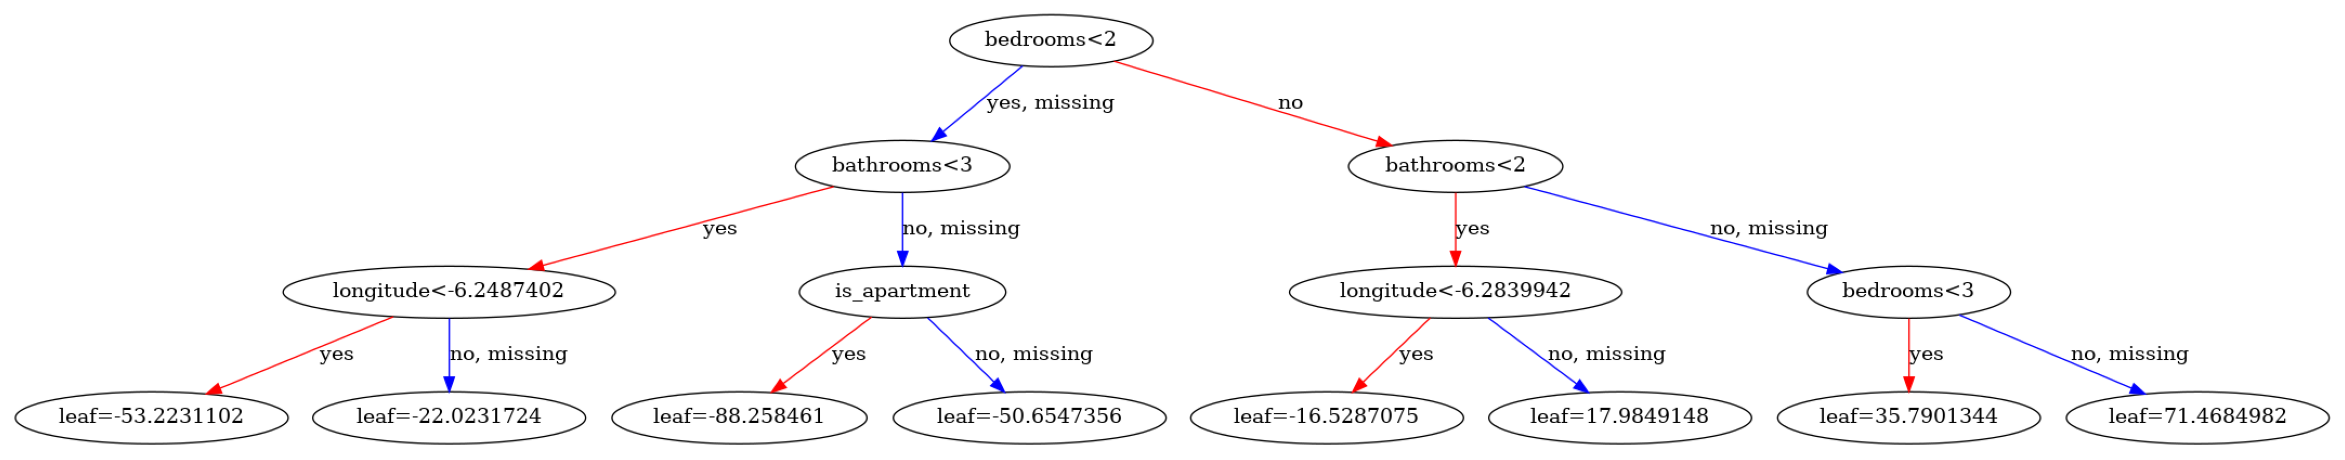

In [47]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(grid_search.best_estimator_, ax=ax)
plt.show()